In [20]:
import pandas
demo_df = pandas.read_sas('P_Demographics.XPT')
foods_df = pandas.read_sas('P_IndividualFoods.XPT')
nutritients_df = pandas.read_sas('P_TotalNutritient.XPT')
food_desc_df = pandas.read_sas('P_FoodDesc.XPT')
body_measures = pandas.read_sas('P_BodyMeasures.XPT')
hdl_df = pandas.read_sas('P_HighDensityLipoprotein.XPT')
ldl_df = pandas.read_sas('P_LowDensityLipoproteins.XPT')
cholesterol_df = pandas.read_sas('P_TotalCholesterol.XPT')
print(len(food_desc_df['DRXFDCD']))

<ipython-input-20-75d876d7c1cc>:3: UserWarning: xport file may be corrupted.
  foods_df = pandas.read_sas('P_IndividualFoods.XPT')
<ipython-input-20-75d876d7c1cc>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  nutritients_df = pandas.read_sas('P_TotalNutritient.XPT')
<ipython-input-20-75d876d7c1cc>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  nutritients_df = pandas.read_sas('P_TotalNutritient.XPT')
<ipython-input-20-75d876d7c1cc>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling

7444


###Demographical Data Overview###
Overview of data about the demographics of individuals, cleaning the data, visualizations, dropping unnecessary columns and renaming uninformative labels.

In [21]:
print(demo_df.shape)
print(demo_df.head(10))
demo_df = demo_df.drop(columns = ['SDDSRVYR', 'RIDRETH1', 'SIALANG', 'SIAPROXY', 'SIAINTRP', 'FIALANG',
                        'FIAPROXY', 'FIAINTRP', 'MIALANG', 'MIAPROXY', 'MIAINTRP', 'AIALANGA',
                        'WTINTPRP', 'WTINTPRP', 'WTMECPRP', 'SDMVPSU', 'SDMVSTRA'])
demo_df = demo_df.rename(columns={'RIDSTATR': 'INTRVW_STATUS', 'RIAGENDR':'GENDR',
                        'RIDAGEYR':'AGE_YR', 'RIDAGEMN':'AGEMNS', 'RIDRETH3':'RACE',
                        'RIDEXMON': 'PERIOD', 'DMDBORN4':'ORGCOUNTRY',
                        'DMDYRUSZ':'TIMEUS', 'DMDEDUC2':'EDUCTN', 'DMDMARTZ':'MARITALSTS',
                        'RIDEXPRG': 'PREGNSTATUS', 'INDFMPIR': 'INCOMEPOVERTY'})
print(demo_df.shape)
print(demo_df.head(10))

(15560, 29)
       SEQN  SDDSRVYR  RIDSTATR  RIAGENDR      RIDAGEYR  RIDAGEMN  RIDRETH1  \
0  109263.0      66.0       2.0       1.0  2.000000e+00       NaN       5.0   
1  109264.0      66.0       2.0       2.0  1.300000e+01       NaN       1.0   
2  109265.0      66.0       2.0       1.0  2.000000e+00       NaN       3.0   
3  109266.0      66.0       2.0       2.0  2.900000e+01       NaN       5.0   
4  109267.0      66.0       1.0       2.0  2.100000e+01       NaN       2.0   
5  109268.0      66.0       1.0       2.0  1.800000e+01       NaN       3.0   
6  109269.0      66.0       2.0       1.0  2.000000e+00       NaN       2.0   
7  109270.0      66.0       2.0       2.0  1.100000e+01       NaN       4.0   
8  109271.0      66.0       2.0       1.0  4.900000e+01       NaN       3.0   
9  109272.0      66.0       2.0       1.0  5.397605e-79       3.0       1.0   

   RIDRETH3  RIDEXMON  DMDBORN4  ...  FIAINTRP  MIALANG  MIAPROXY  MIAINTRP  \
0       6.0       2.0       1.0  ...   

SEQN - Respondent sequence number(15560)

INTRVW_STATUS - Interview and examination status of the participant(Interviewed only/Both interviewed and MEC examined)

GENDR - Gender of the participant (1 male/ 2 female)

AGE_YR - Age in years of the participant at the time of screening. Individuals 80 and over are topcoded at 80 years of age.

AGEMNS - Age in months of the participant at the time of screening. Reported for persons aged 24 months or younger at the time of exam (or screening if not examined).

RACE - 1) Mexican American, 2) Other Hispanic, 3) Non-Hispanic White, 4) Non-Hisanic Black, 6) Non-Hispanic Asian, 7) Other Race - Including Multi-Racial

PERIOD - Six month time period when the examination was performed - two categories: November 1 through April 30, May 1 through October 31.

ORGCOUNTRY - In what country born?

TIMEUS - Length of time the participant has been in the US

EDUCTN - What is the highest grade or level of school completed or the highest degree received?

MARITALSTS - Marital status (Married/Living with Partner, Widowed/Divorced/Separated, Never married, Refused, Don't Know, Missing)

PREGNSTATUS - Pregnancy status for females between 20 and 44 years of age at the time of MEC exam.

INCOMEPOVERTY - A ratio of family income to poverty guidelines.

In [22]:
print(demo_df.info()) # shows that there are Null values in
# AGEMNS as only children under 2 years are counted,
# lots of Nans in PERIOD,
# TIMEUS  - Length of time the participant has been in the US - a lot of missing values, consider removing this row
# EDUCTN - Education level - Adults 20+
# MARITALSTS - Marital status - very few (87 pregnant) - consider to remove
# INCOMEPOVERTY - few missed values
num_demo_desc = demo_df.describe()
print(num_demo_desc)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15560 entries, 0 to 15559
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SEQN           15560 non-null  float64
 1   INTRVW_STATUS  15560 non-null  float64
 2   GENDR          15560 non-null  float64
 3   AGE_YR         15560 non-null  float64
 4   AGEMNS         987 non-null    float64
 5   RACE           15560 non-null  float64
 6   PERIOD         14300 non-null  float64
 7   ORGCOUNTRY     15560 non-null  float64
 8   TIMEUS         3028 non-null   float64
 9   EDUCTN         9232 non-null   float64
 10  MARITALSTS     9232 non-null   float64
 11  PREGNSTATUS    1874 non-null   float64
 12  INCOMEPOVERTY  13359 non-null  float64
dtypes: float64(13)
memory usage: 1.5 MB
None
               SEQN  INTRVW_STATUS         GENDR        AGE_YR        AGEMNS  \
count   15560.00000   15560.000000  15560.000000  1.556000e+04  9.870000e+02   
mean   117042.50000      

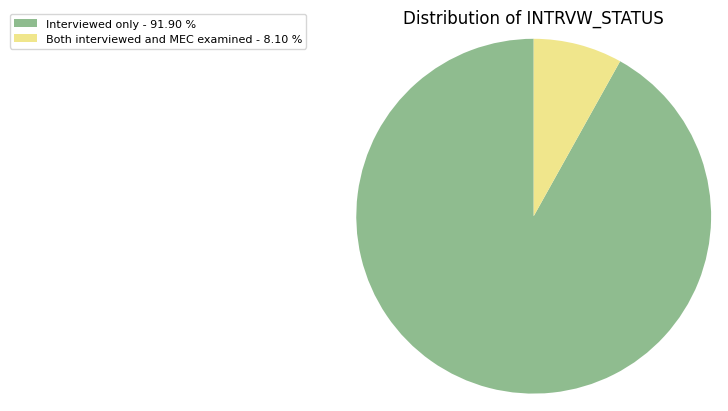

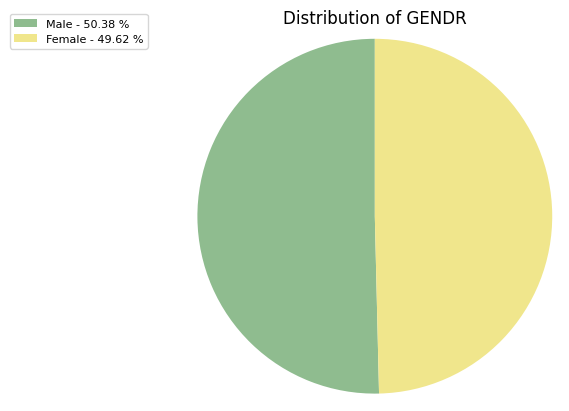

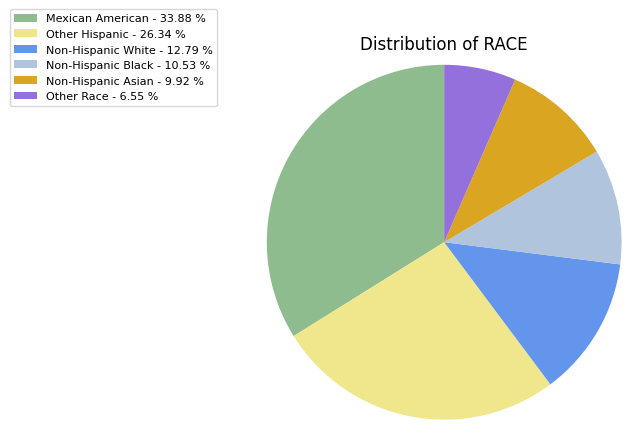

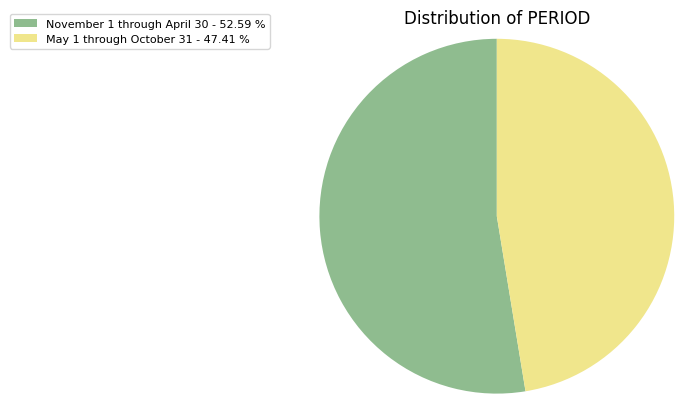

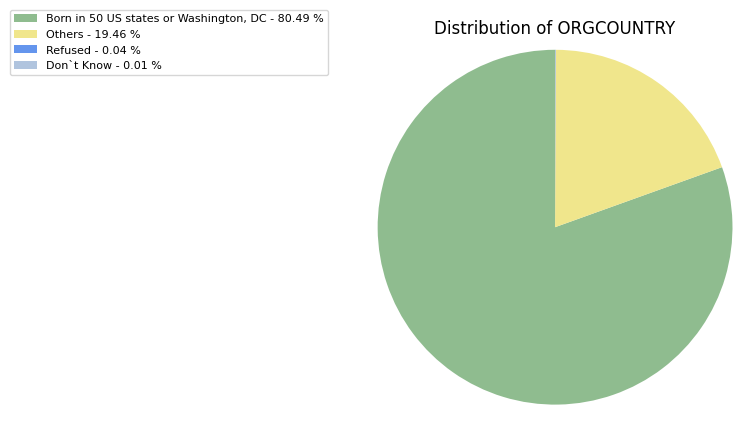

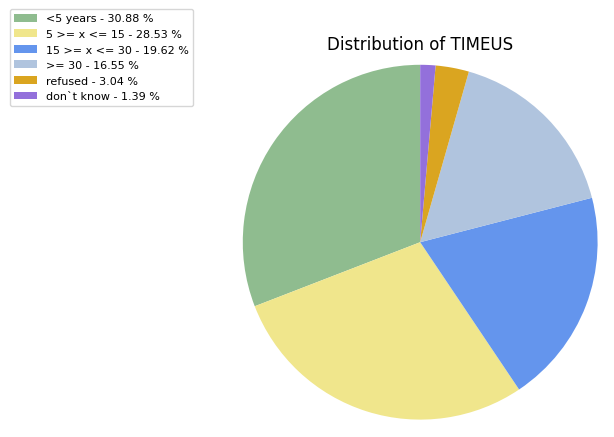

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


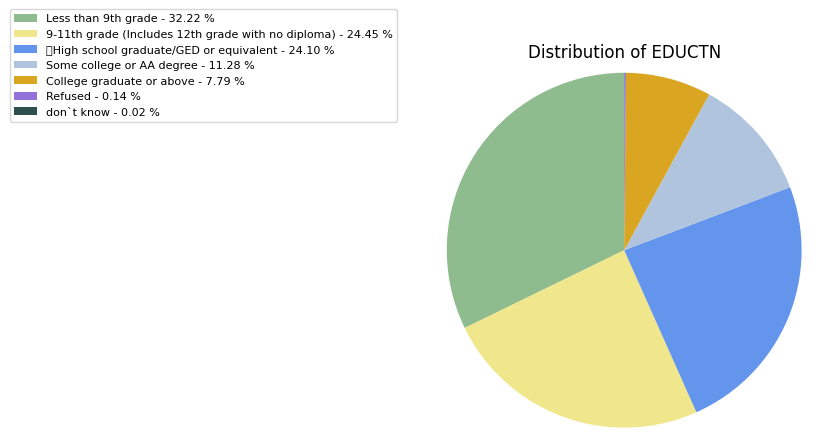

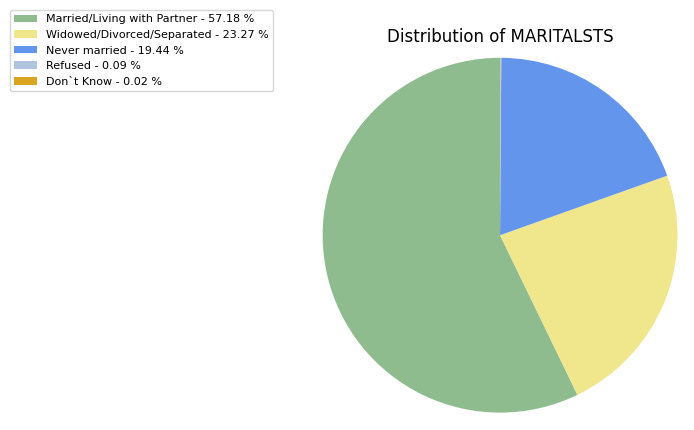

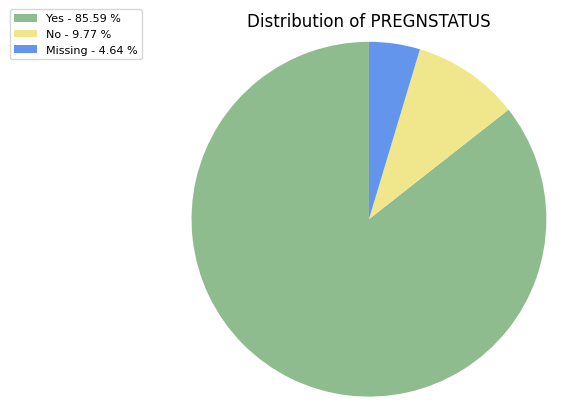

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
# categorical data
pie_chart_columns = ['INTRVW_STATUS', 'GENDR', 'RACE', 'PERIOD', 'ORGCOUNTRY', 'TIMEUS', 'EDUCTN', 'MARITALSTS', 'PREGNSTATUS']

for col in pie_chart_columns:
    counts = demo_df[col].value_counts()
    counts = counts/sum(counts)

    x = np.unique(demo_df[col].values)
    y = counts
    percent = 100.*y/y.sum()

    colors_1 = ['darkseagreen','khaki','cornflowerblue','lightsteelblue','goldenrod','mediumpurple', 'darkslategrey','powderblue','olive','violet']
    patches, texts = plt.pie(y, colors=colors_1, startangle=90, radius=1.2)
    label_names = {'INTRVW_STATUS':['Interviewed only', 'Both interviewed and MEC examined'], 'GENDR':['Male', 'Female'], 'RACE':['Mexican American', 'Other Hispanic', 'Non-Hispanic White', 'Non-Hispanic Black', 'Non-Hispanic Asian', 'Other Race'],
                   'PERIOD': ['November 1 through April 30', 'May 1 through October 31', 'missing'], 'ORGCOUNTRY': ['Born in 50 US states or Washington, DC', 'Others', 'Refused', 'Don`t Know'],
                   'TIMEUS': ['<5 years', '5 >= x <= 15', '15 >= x <= 30', '>= 30', 'refused', 'don`t know', 'missing'],
                   'EDUCTN': ['Less than 9th grade', '9-11th grade (Includes 12th grade with no diploma)', '	High school graduate/GED or equivalent', 'Some college or AA degree', 'College graduate or above', 'Refused', 'don`t know', 'missing'],
                   'MARITALSTS': ['Married/Living with Partner', 'Widowed/Divorced/Separated', 'Never married', 'Refused', 'Don`t Know', 'missing'], 'PREGNSTATUS': ['Yes', 'No', 'Missing']}
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(label_names[col], percent)]

    sort_legend = True
    if sort_legend:
        patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                              key=lambda x: x[2],
                                              reverse=True))
    plt.legend(patches, labels, loc='center right', bbox_to_anchor=(-0.1, 1.),
              fontsize=8)
    plt.title(f'Distribution of {col}')
    plt.show()

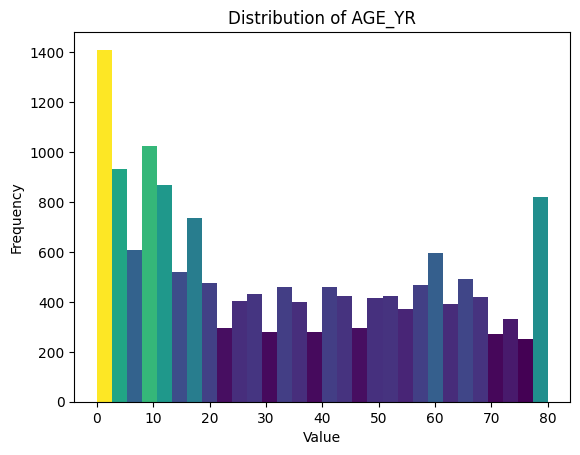

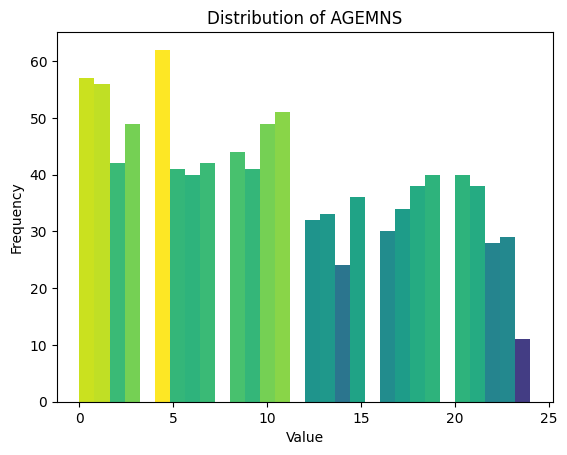

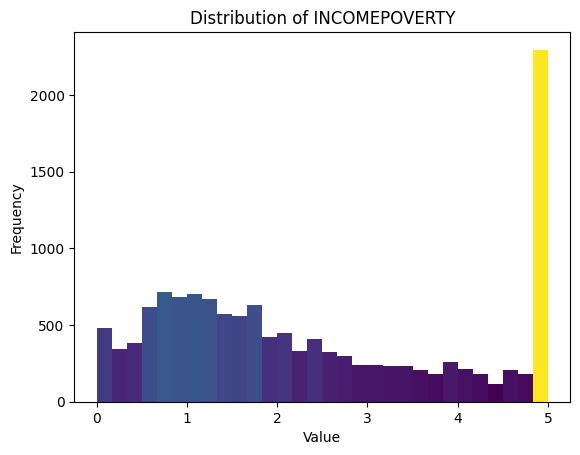

In [24]:
bar_chart_columns = ['AGE_YR', 'AGEMNS', 'INCOMEPOVERTY']
for col in bar_chart_columns:
    data = demo_df[col]

    # Partly taken from https://matplotlib.org/stable/gallery/statistics/hist.html
    # N is the count in each bin, bins is the lower-limit of the bin
    N, bins, patches = plt.hist(data, bins=30)
    # We'll color code by height, but you could use any scalar
    fracs = N / N.max()
    # we need to normalize the data to 0..1 for the full range of the colormap
    norm = colors.Normalize(fracs.min(), fracs.max())
    # Now, we'll loop through our objects and set the color of each accordingly
    for thisfrac, thispatch in zip(fracs, patches):
        color = plt.cm.viridis(norm(thisfrac))
        thispatch.set_facecolor(color)

    plt.title(f'Distribution of {col}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

###Total Nutritients Overview###
Overview of data about total nutritients eaten by a person, cleaning the data, visualizations, dropping unnecessary columns and renaming uninformative labels.

In [25]:
print(nutritients_df.shape)
print(nutritients_df.head(10))
filt_nutr_df = nutritients_df[nutritients_df['DR1DRSTZ'] == 1] # only reliable results
filt_nutr_df = filt_nutr_df[filt_nutr_df['DRABF'] != 1] # remove breast-fed infant
filt_nutr_df = filt_nutr_df[filt_nutr_df['DRDINT'] == 2] # only people with data about 2 days

nutritients_df = nutritients_df.drop(columns = ['DR1DRSTZ', 'DR1EXMER', 'DBQ095Z', 'DBD100', 'DRABF', 'DR1DBIH', 'DR1DAY',  'DR1LANG', 'DR1MRESP', 'DR1HELP', 'DR1STY', 'DR1SKY', 'DR1TACAR', 'DR1TCRYP', 'DR1TLYCO', 'DR1TLZ',
'DR1TVB1', 'DR1TVB2', 'DR1TNIAC', 'DR1TFOLA', 'DR1TFA', 'DR1TFF', 'DR1TFDFE', 'DR1TCHL', 'DR1TB12A', 'DR1TCOPP', 'DR1TTHEO', 'DR1TMOIS',
'DR1TS040', 'DR1TS060', 'DR1TS080', 'DR1TS100', 'DR1TS120', 'DR1TS140', 'DR1TS160', 'DR1TS180', 'DR1TM161', 'DR1TM181', 'DR1TM201', 'DR1TM221', 'DR1TP182', 'DR1TP183',
'DR1TP184', 'DR1TP204', 'DR1TP205', 'DR1TP225', 'DR1TP226', 'DR1_300', 'DR1TWSZ', 'DRD350A', 'DRD350AQ', 'DRD350B', 'DRD350BQ', 'DRD350C', 'DRD350CQ', 'DRD350D', 'DRD350DQ',
'DRD350E', 'DRD350EQ', 'DRD350F', 'DRD350FQ', 'DRD350G', 'DRD350GQ', 'DRD350HQ', 'DRD350I', 'DRD350IQ', 'DRD350J', 'DRD350JQ', 'DRD350K', 'DRD370A', 'DRD370AQ', 'DRD370BQ', 'DRD370C',
'DRD370CQ', 'DRD370D', 'DRD370DQ', 'DRD370E', 'DRD370EQ', 'DRD370F', 'DRD370FQ', 'DRD370G', 'DRD370GQ', 'DRD370H', 'DRD370HQ', 'DRD370I', 'DRD370IQ', 'DRD370J', 'DRD370JQ', 'DRD370K', 'DRD370KQ',
 'DRD370L', 'DRD370LQ', 'DRD370MQ', 'DRD370N', 'DRD370NQ', 'DRD370O', 'DRD370OQ', 'DRD370P', 'DRD370PQ', 'DRD370Q', 'DRD370QQ', 'DRD370R', 'DRD370RQ', 'DRD370S', 'DRD370SQ', 'DRD370T', 'DRD370TQ',
'DRD370U', 'DRD370UQ', 'DRD370V', 'DR1_330Z', 'DR1BWATZ'])

nutritients_df = nutritients_df.rename(columns={'WTDRD1PP': 'D1SMPLWEIGHT', 'WTDR2DPP': 'D2SMPLWEIGHT', 'DRQSPREP':'SALTUSE',
'DRQSDIET':'SPECDIET', 'DRQSDT1':'LOWCALD', 'DRQSDT2':'LOWFATD', 'DRQSDT3':'LOWSALTD', 'DRQSDT4': 'SUGARFREED', 'DRQSDT5':'LOWFIBERD', 'DRQSDT6': 'HIGHFIBERD', 'DRQSDT7':'DIABETICD',
'DRQSDT8':'WEIGHTGAIND', 'DRQSDT9':'LOWCARBSD', 'DRQSDT10':'HIGHPROTD', 'DRQSDT11':'GLUTENFREED', 'DRQSDT12':'KIDNEYD', 'DRQSDT91':'OTHERSPECD', 'DR1_320Z':'WATERCONS',
'DRD340': 'SHELLFISHCONS', 'DRD350H':'SHRIMPSCONS', 'DRD360':'FISHCONS', 'DRD370B':'TUNACONS', 'DRD370M':'SALMONCONS'})
print(nutritients_df.shape)
print(nutritients_df.head(10))

(14300, 168)
       SEQN      WTDRD1PP      WTDR2DPP  DR1DRSTZ  DR1EXMER  DRABF  DRDINT  \
0  109263.0   7619.483586  17808.067666       1.0      14.0    2.0     2.0   
1  109264.0   8235.895818   7253.761719       1.0      81.0    2.0     2.0   
2  109265.0  33535.080310  35612.007356       1.0      88.0    2.0     2.0   
3  109266.0   6831.068440   5988.203624       1.0      81.0    2.0     2.0   
4  109269.0   7875.706968  18231.925894       1.0      88.0    2.0     2.0   
5  109270.0  11253.515890  14177.916842       1.0      81.0    2.0     2.0   
6  109271.0  15526.880504  15977.650915       1.0      81.0    2.0     2.0   
7  109272.0   7432.492308   6641.604606       4.0      81.0    1.0     2.0   
8  109273.0  40576.776836  56511.019998       1.0      73.0    2.0     2.0   
9  109274.0  12294.159900  12374.817962       1.0      81.0    2.0     2.0   

   DR1DBIH  DR1DAY  DR1LANG  ...  DRD370QQ  DRD370R  DRD370RQ  DRD370S  \
0      4.0     6.0      1.0  ...       NaN      NaN   

In [26]:
num_data_nutritients = ['D1SMPLWEIGHT', 'D2SMPLWEIGHT', 'DRDINT', 'DR1TNUMF', 'DR1TKCAL', 'DR1TPROT', 'DR1TCARB',
                        'DR1TSUGR', 'DR1TFIBE', 'DR1TTFAT', 'DR1TSFAT', 'DR1TMFAT', 'DR1TPFAT',
                        'DR1TCHOL', 'DR1TATOC', 'DR1TATOA', 'DR1TRET', 'DR1TVARA', 'DR1TBCAR', 'DR1TVB6',
                        'DR1TVB12', 'DR1TVC', 'DR1TVD', 'DR1TVK', 'DR1TCALC', 'DR1TPHOS', 'DR1TMAGN',
                        'DR1TIRON','DR1TZINC', 'DR1TSODI', 'DR1TPOTA', 'DR1TSELE', 'DR1TCAFF', 'DR1TALCO',
                        'WATERCONS']
cat_data_nutritients = ['SALTUSE', 'SPECDIET', 'SHELLFISHCONS', 'SHRIMPSCONS', 'FISHCONS', 'TUNACONS', 'SALMONCONS']
spec_diets = ['LOWCALD',  'LOWFATD', 'LOWSALTD', 'SUGARFREED', 'LOWFIBERD', 'HIGHFIBERD', 'DIABETICD', 'WEIGHTGAIND', 'LOWCARBSD', 'HIGHPROTD', 'GLUTENFREED', 'KIDNEYD', 'OTHERSPECD']
print(len(num_data_nutritients)+len(cat_data_nutritients)+len(spec_diets))
print(nutritients_df.columns)


55
Index(['SEQN', 'D1SMPLWEIGHT', 'D2SMPLWEIGHT', 'DRDINT', 'SALTUSE', 'SPECDIET',
       'LOWCALD', 'LOWFATD', 'LOWSALTD', 'SUGARFREED', 'LOWFIBERD',
       'HIGHFIBERD', 'DIABETICD', 'WEIGHTGAIND', 'LOWCARBSD', 'HIGHPROTD',
       'GLUTENFREED', 'KIDNEYD', 'OTHERSPECD', 'DR1TNUMF', 'DR1TKCAL',
       'DR1TPROT', 'DR1TCARB', 'DR1TSUGR', 'DR1TFIBE', 'DR1TTFAT', 'DR1TSFAT',
       'DR1TMFAT', 'DR1TPFAT', 'DR1TCHOL', 'DR1TATOC', 'DR1TATOA', 'DR1TRET',
       'DR1TVARA', 'DR1TBCAR', 'DR1TVB6', 'DR1TVB12', 'DR1TVC', 'DR1TVD',
       'DR1TVK', 'DR1TCALC', 'DR1TPHOS', 'DR1TMAGN', 'DR1TIRON', 'DR1TZINC',
       'DR1TSODI', 'DR1TPOTA', 'DR1TSELE', 'DR1TCAFF', 'DR1TALCO', 'WATERCONS',
       'SHELLFISHCONS', 'SHRIMPSCONS', 'FISHCONS', 'TUNACONS', 'SALMONCONS'],
      dtype='object')


In [27]:
print(demo_df.shape)
print(nutritients_df.shape)
joined_data = pandas.concat([demo_df.set_index('SEQN'), nutritients_df.set_index('SEQN')], axis=1, join='inner')
print(joined_data.shape)

(15560, 13)
(14300, 56)
(14300, 67)


In [29]:
# exclude children
joined_data_age_18 = joined_data[joined_data['AGE_YR'] >= 18]
print(joined_data_age_18.shape)

(8965, 67)


In [31]:
# exclude outliers
joined_age_kcal = joined_data_age_18[(joined_data_age_18['DR1TKCAL']>=500) & (joined_data_age_18['DR1TKCAL']<=6000)]
print(joined_age_kcal.shape)

(7956, 67)


In [32]:
# exclude pregnant
joined_age_kcal_pregnant = joined_age_kcal[joined_age_kcal['PREGNSTATUS']!=1]
print(joined_age_kcal_pregnant.shape)

(7880, 67)


In [ ]:
print(foods_df.shape)
print(foods_df.head(10))
print(foods_df['SEQN'].nunique())
# demo_df = demo_df.drop(columns = ['SDDSRVYR', 'RIDRETH1', 'SIALANG', 'SIAPROXY', 'SIAINTRP', 'FIALANG',
#                         'FIAPROXY', 'FIAINTRP', 'MIALANG', 'MIAPROXY', 'MIAINTRP', 'AIALANGA',
#                         'WTINTPRP', 'WTINTPRP', 'WTMECPRP', 'SDMVPSU', 'SDMVSTRA'])
# demo_df = demo_df.rename(columns={'RIDSTATR': 'INTRVW_STATUS', 'RIAGENDR':'GENDR',
#                         'RIDAGEYR':'AGE_YR', 'RIDAGEMN':'AGEMNS', 'RIDRETH3':'RACE',
#                         'RIDEXMON': 'PERIOD', 'DMDBORN4':'ORGCOUNTRY',
#                         'DMDYRUSZ':'TIMEUS', 'DMDEDUC2':'EDUCTN', 'DMDMARTZ':'MARITALSTS',
#                         'RIDEXPRG': 'PREGNSTATUS', 'INDFMPIR': 'INCOMEPOVERTY'})
# print(demo_df.shape)
# print(demo_df.head(10))

(183910, 84)
       SEQN     WTDRD1PP      WTDR2DPP  DR1ILINE  DR1DRSTZ  DR1EXMER  DRABF  \
0  109263.0  7619.483586  17808.067666      12.0       1.0      14.0    2.0   
1  109263.0  7619.483586  17808.067666      10.0       1.0      14.0    2.0   
2  109263.0  7619.483586  17808.067666       4.0       1.0      14.0    2.0   
3  109263.0  7619.483586  17808.067666       9.0       1.0      14.0    2.0   
4  109263.0  7619.483586  17808.067666      13.0       1.0      14.0    2.0   
5  109263.0  7619.483586  17808.067666       6.0       1.0      14.0    2.0   
6  109263.0  7619.483586  17808.067666       8.0       1.0      14.0    2.0   
7  109263.0  7619.483586  17808.067666       3.0       1.0      14.0    2.0   
8  109263.0  7619.483586  17808.067666       2.0       1.0      14.0    2.0   
9  109263.0  7619.483586  17808.067666       7.0       1.0      14.0    2.0   

   DRDINT  DR1DBIH  DR1DAY  ...      DR1IM181      DR1IM201      DR1IM221  \
0     2.0      4.0     6.0  ...  1.94100